In [98]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [99]:
# load image path
import cv2 as cv
from keras.utils.image_utils import load_img,img_to_array
img_folder = Path("data")

label = ["bread","egg","meat",'noodle',"rice"]
test_image = list([])
X_data = np.empty((0,32*32))
Y_label = []

for i in range(len(label)):
    train_folder = img_folder/label[i]
    test = list(train_folder.glob("*.jpeg"))
    test_image = test_image + test
    Y_label = Y_label+[i]*len(list(train_folder.glob("*.jpeg")))

for  i in range(len(test_image)):
    image_path = str(test_image[i])
    img = load_img(image_path,target_size=(32,32),color_mode = "grayscale")
    img= img_to_array(img)
    img = img.astype("float32")/255
    

    img = np.reshape(img,(1,32*32))
    X_data = np.vstack((X_data,img))
print(X_data.dtype)

float64


In [101]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Flatten(input_shape=[32*32]))

model.add(layers.Dense(512,activation="relu"))

model.add(layers.Dense(100,activation="relu"))


model.add(layers.Dense(5,activation="softmax"))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 1024)              0         
                                                                 
 dense_31 (Dense)            (None, 512)               524800    
                                                                 
 dense_32 (Dense)            (None, 100)               51300     
                                                                 
 dense_33 (Dense)            (None, 5)                 505       
                                                                 
Total params: 576,605
Trainable params: 576,605
Non-trainable params: 0
_________________________________________________________________


In [102]:
model.compile(optimizer= "rmsprop",loss = "categorical_crossentropy",metrics=["accuracy"])

In [103]:
from keras.utils import to_categorical
Y_label = to_categorical(Y_label)

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_label,test_size=0.2,shuffle=True)

In [105]:
model.fit(X_train,Y_train,epochs =50,batch_size =4,validation_data=[X_test,Y_test])

Epoch 1/50
21/21 [==============================] - 1s 9ms/step - loss: 2.7121 - accuracy: 0.2651 - val_loss: 1.9426 - val_accuracy: 0.1429
Epoch 2/50
21/21 [==============================] - 0s 5ms/step - loss: 1.7713 - accuracy: 0.2289 - val_loss: 1.7816 - val_accuracy: 0.1429
Epoch 3/50
21/21 [==============================] - 0s 6ms/step - loss: 1.7236 - accuracy: 0.2530 - val_loss: 1.5439 - val_accuracy: 0.1905
Epoch 4/50
21/21 [==============================] - 0s 6ms/step - loss: 1.6405 - accuracy: 0.3253 - val_loss: 1.8975 - val_accuracy: 0.2857
Epoch 5/50
21/21 [==============================] - 0s 5ms/step - loss: 1.6717 - accuracy: 0.2530 - val_loss: 1.7491 - val_accuracy: 0.2381
Epoch 6/50
21/21 [==============================] - 0s 5ms/step - loss: 1.6070 - accuracy: 0.2530 - val_loss: 1.6122 - val_accuracy: 0.2381
Epoch 7/50
21/21 [==============================] - 0s 5ms/step - loss: 1.5167 - accuracy: 0.4096 - val_loss: 1.9390 - val_accuracy: 0.3333
Epoch 8/50
21/21 [==

In [109]:
from keras.utils.image_utils import load_img
image = load_img('img/egg.jpg', target_size=(32,32),color_mode="grayscale") 

In [110]:
classnames= ["bread","egg","meat","noodle"]

1/1 [==============================] - 0s 14ms/step
egg


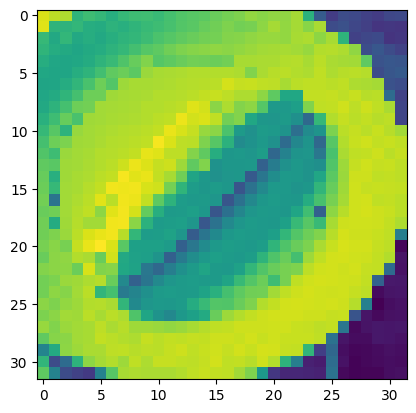

In [111]:
from keras.utils.image_utils import img_to_array
img = img_to_array(image)
img = img.reshape(1,1024)
img = img.astype('float32')
img = img/255
tag = np.argmax(model.predict(img),axis=1)
plt.imshow(image)
print(classnames[tag[0]])